In [1]:
from time import time
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

$$ 
\frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2} - u\frac{\partial C}{\partial x} + r
$$

In [376]:
def PFR(t, y, u, D, c_in, dx):
    """
    Differential equations for the PFR equations.

    The ODEs are derived using the method of lines.
    """
    # dydt is the return value of this function.
    dydt = np.zeros_like(y)
    #y[0]=c_in
    # Compute dy/dt.  The end points and the interior points
    # are handled separately.
    dydt[0] = - u*(-c_in+y[0])/dx# + D*(-2.0*c_in + 2.0*y[1]) / dx**2
    #dydt[1:-1] = D*np.diff(y,2) / dx**2
#     dydt[1:] -= u*np.diff(y)/2/dx
    dydt -= u*np.gradient(y, edge_order=2)/2/dx
#     dydt[1:-1] -= u*(y[2:]-y[:-2])/dx
#     dydt[-1]   -= u*(-y[-2]+y[-1])/dx #+ 2.0*D*(- y[-1] + y[-2]) / dx**2# - u*(-y[-1]+y[-2])/dx
    
    return dydt

In [383]:
N = 100
x = np.linspace(0,1, num=N+1)
y0 = np.zeros_like(x)
y0[0]=0
# y0 = np.random.randn(5000)
t = np.linspace(0, 50, 100)
u = 0.1
D = 0.0
c_in = 1
dx = 1/N

In [386]:
time0= time()
sol = solve_ivp(lambda t,y: PFR(t,y,u,D,c_in,dx), (0,50), y0, method='BDF', rtol=1e-1, atol=1e-2)
print(time()-time0)

1.166116714477539


In [387]:
from ipywidgets import interact, widgets
@interact
def f(t=(0, len(sol.t)-1)):
    y = sol.y[:,t]
    plt.plot(x,y)
    plt.plot(x[1:],np.diff(y))
    plt.plot(x,np.gradient(y))
#     plt.plot(x[2:-2], (y[3:]-y[:-3])/2)
    plt.title(f'time_g={sol.t[t]:.5f}')
    plt.ylim((-1,1.2))

interactive(children=(IntSlider(value=143, description='t', max=287), Output()), _dom_classes=('widget-interac…

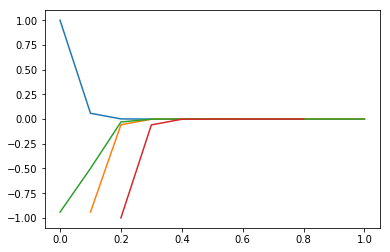

In [256]:
y = sol.y[:,10]
plt.plot(x,y)
plt.plot(x[1:],np.diff(y))
plt.plot(x,np.gradient(y))
plt.plot(x[2:-2], y[4:]-y[:-4])

In [283]:
y=np.arange(10)**2
print(y)
y2 = np.diff(y,4, prepend=0, append=0)
print(y2)
len(y2)

[ 0  1  4  9 16 25 36 49 64 81]
[  -1    0    0    0    0    0    0 -100]


8